In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
col_name  = ['Name', 'Age', 'Weight', 'm0006', 'm0612', 'm1218', 'f0006', 'f0612', 'f1218']
df = pd.read_csv('patient_heart_rate.csv', header=0)
df.head(5)

,Id,Name,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218
0,1.0,Mickéy Mousé,56.0,70kgs,72,69,71,-,-,-
1,2.0,Donald Duck,34.0,154.89lbs,-,-,-,85,84,76
2,3.0,Mini Mouse,16.0,NaN,-,-,-,65,69,72
3,4.0,Scrooge McDuck,NaN,78kgs,78,79,72,-,-,-
4,5.0,Pink Panther,54.0,198.658lbs,-,-,-,69,NaN,75


In [5]:
df[['First_Name', 'Last_Name']] = df['Name'].str.split(expand=True)
df = df.drop('Name', axis=1)
df.head(5)

,Id,Age,Weight,m0006,m0612,m1218,f0006,f0612,f1218,First_Name,Last_Name
0,1.0,56.0,70kgs,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,154.89lbs,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78kgs,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,198.658lbs,-,-,-,69,NaN,75,Pink,Panther


In [6]:
weight = df['Weight']

for i in range(0, len(weight)):
    x = str(weight[i])
    if 'lbs' in x:
        x = x[:-3:]
        float_x = float(x)
        y = int(float_x/2.2)
        weight[i] = y
    if 'kgs' in x:
        x = x[:-3:]
        float_x = float(x)
        weight[i] = x

df.rename(columns={'Weight': 'Weight_kgs'}, inplace=True)
df.head(5)

C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1786102397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1786102397.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = y
C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1786102397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weight[i] = x
C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\178610

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First_Name,Last_Name
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [7]:
df.shape

(17, 11)

In [8]:
df.dropna(how='all', inplace=True)
df.shape

(15, 11)

In [9]:
df = df.drop_duplicates(subset=['First_Name', 'Last_Name', 'Age', 'Weight_kgs'])
df.shape

(14, 11)

In [111]:
df.First_Name.replace({r'[\x00-\x7F]+':''}, regex=True, inplace=True)
df.Last_Name.replace({r'[\x00-\x7F]+':''}, regex=True, inplace=True)
print(df)

      Id   Age Weight_kgs m0006 m0612 m1218 f0006 f0612 f1218 First_Name  \
0    1.0  56.0         70    72    69    71     -     -     -          é   
1    2.0  34.0         70     -     -     -    85    84    76              
2    3.0  16.0        NaN     -     -     -    65    69    72              
3    4.0   NaN         78    78    79    72     -     -     -              
4    5.0  54.0         90     -     -     -    69   NaN    75              
5    6.0  52.0         85     -     -     -    68    75    72              
6    7.0  19.0         56     -     -     -    71    78    75              
7    8.0  32.0         78    78    76    75     -     -     -         öö   
11  10.0  12.0         45     -     -     -    92    95    87              
12  11.0   NaN         60    78    75    72     -     -     -              
13  12.0  34.0        NaN    65    67    55     -     -     -              
14  13.0   NaN        NaN     -     -     -    68    72    70              
15  14.0   N

C:\Users\nguye\AppData\Local\Temp\ipykernel_10808\4011530951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.First_Name.replace({r'[\x00-\x7F]+': ''}, regex=True, inplace=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_10808\4011530951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [10]:
df.head(5)

,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First_Name,Last_Name
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,NaN,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [11]:
df['Age'].fillna(df['Age'].mode()[0], inplace=True)
df.head(5)

C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\3111572537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True)


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First_Name,Last_Name
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,NaN,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [12]:
df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)
df.head(5)

C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1512070506.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kgs'].fillna(df['Weight_kgs'].median(), inplace=True)


,Id,Age,Weight_kgs,m0006,m0612,m1218,f0006,f0612,f1218,First_Name,Last_Name
0,1.0,56.0,70,72,69,71,-,-,-,Mickéy,Mousé
1,2.0,34.0,70,-,-,-,85,84,76,Donald,Duck
2,3.0,16.0,74.0,-,-,-,65,69,72,Mini,Mouse
3,4.0,34.0,78,78,79,72,-,-,-,Scrooge,McDuck
4,5.0,54.0,90,-,-,-,69,NaN,75,Pink,Panther


In [13]:
df = pd.melt(df, id_vars=['Id', 'Age', 'Weight_kgs', 'First_Name', 'Last_Name'],
            value_name='Pluse_rate',
            var_name='gender_time').sort_values(['Id', 'Age', 'Weight_kgs', 'First_Name', 'Last_Name'])

In [14]:
df.head(5)

,Id,Age,Weight_kgs,First_Name,Last_Name,gender_time,Pluse_rate
0,1.0,56.0,70,Mickéy,Mousé,m0006,72
14,1.0,56.0,70,Mickéy,Mousé,m0612,69
28,1.0,56.0,70,Mickéy,Mousé,m1218,71
42,1.0,56.0,70,Mickéy,Mousé,f0006,-
56,1.0,56.0,70,Mickéy,Mousé,f0612,-


In [15]:
df_temp = df['gender_time'].str.extract('(\D)(\d+)(\d{2})', expand=True)
df_temp.columns = ['Gender', 'Lower_hour', 'Upper_hour']
df_temp.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\3761654996.py:1: SyntaxWarning: invalid escape sequence '\D'
  df_temp = df['gender_time'].str.extract('(\D)(\d+)(\d{2})', expand=True)


,Gender,Lower_hour,Upper_hour
0,m,00,06
14,m,06,12
28,m,12,18
42,f,00,06
56,f,06,12


In [16]:
df = pd.concat([df, df_temp], axis=1)


In [17]:
df = df.drop(['gender_time'], axis=1)

In [18]:
df = df.replace('-', np.nan).dropna(subset=['Pluse_rate'])

In [19]:
df.head(5)

,Id,Age,Weight_kgs,First_Name,Last_Name,Pluse_rate,Gender,Lower_hour,Upper_hour
0,1.0,56.0,70,Mickéy,Mousé,72,m,00,06
14,1.0,56.0,70,Mickéy,Mousé,69,m,06,12
28,1.0,56.0,70,Mickéy,Mousé,71,m,12,18
43,2.0,34.0,70,Donald,Duck,85,f,00,06
57,2.0,34.0,70,Donald,Duck,84,f,06,12


In [20]:
df['First_Name'].isnull().sum()
df['Last_Name'].isnull().sum()

3

In [21]:
df['First_Name'].fillna('Unknown', inplace=True)
df['Last_Name'].fillna('Unknown', inplace=True)
df['First_Name'].isnull().sum()
df['Last_Name'].isnull().sum()

C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1173529055.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['First_Name'].fillna('Unknown', inplace=True)
C:\Users\nguye\AppData\Local\Temp\ipykernel_15480\1173529055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

0

In [22]:
df.reset_index()

,index,Id,Age,Weight_kgs,First_Name,Last_Name,Pluse_rate,Gender,Lower_hour,Upper_hour
0,0,1.0,56.0,70,Mickéy,Mousé,72,m,00,06
1,14,1.0,56.0,70,Mickéy,Mousé,69,m,06,12
2,28,1.0,56.0,70,Mickéy,Mousé,71,m,12,18
3,43,2.0,34.0,70,Donald,Duck,85,f,00,06
4,57,2.0,34.0,70,Donald,Duck,84,f,06,12
5,71,2.0,34.0,70,Donald,Duck,76,f,12,18
6,44,3.0,16.0,74.0,Mini,Mouse,65,f,00,06
7,58,3.0,16.0,74.0,Mini,Mouse,69,f,06,12
8,72,3.0,16.0,74.0,Mini,Mouse,72,f,12,18
9,3,4.0,34.0,78,Scrooge,McDuck,78,m,00,06


In [23]:
df.to_csv('patient_heart_rate_clean.csv', index=False)

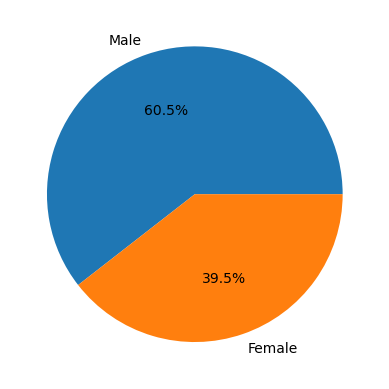

In [24]:
# pie chart gender
data = df['Gender'].value_counts()
plt.pie(data, labels=('Male', 'Female'), autopct='%1.1f%%')
plt.show()

In [25]:
df['Full_Name'] = df['First_Name'] + ' ' + df['Last_Name']
df.head(5)

,Id,Age,Weight_kgs,First_Name,Last_Name,Pluse_rate,Gender,Lower_hour,Upper_hour,Full_Name
0,1.0,56.0,70,Mickéy,Mousé,72,m,00,06,Mickéy Mousé
14,1.0,56.0,70,Mickéy,Mousé,69,m,06,12,Mickéy Mousé
28,1.0,56.0,70,Mickéy,Mousé,71,m,12,18,Mickéy Mousé
43,2.0,34.0,70,Donald,Duck,85,f,00,06,Donald Duck
57,2.0,34.0,70,Donald,Duck,84,f,06,12,Donald Duck


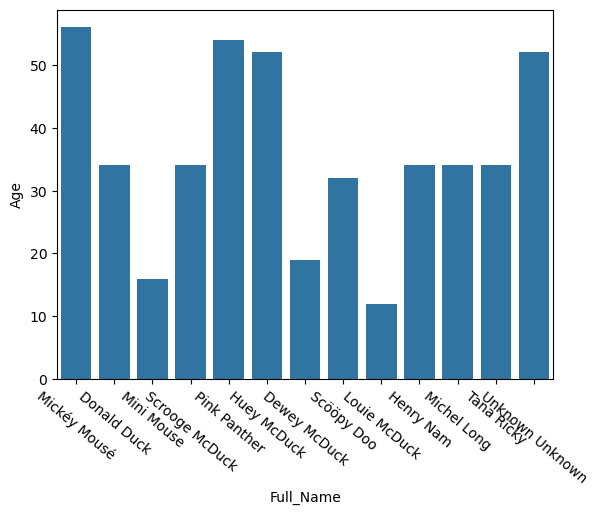

In [26]:
sns.barplot(x='Full_Name', y='Age', data=df)
plt.xticks(rotation=-40)
plt.show()

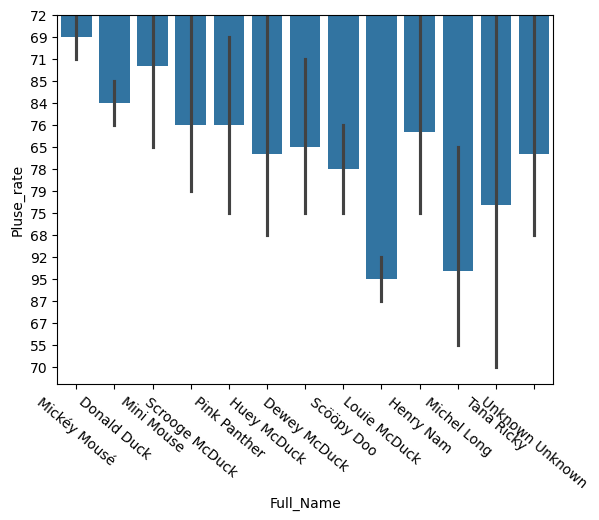

In [27]:
sns.barplot(x='Full_Name', y='Pluse_rate', data=df)
plt.xticks(rotation=-40)
plt.show()

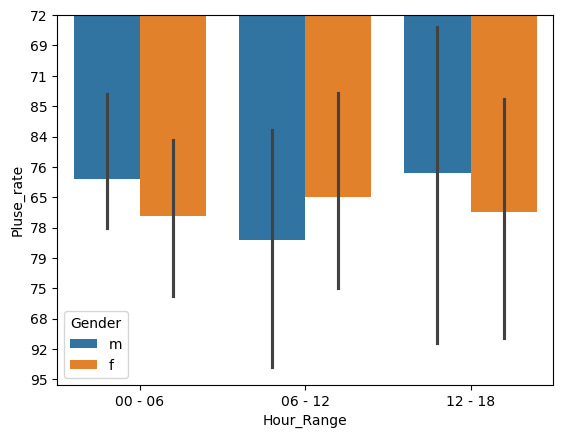

In [28]:
df['Hour_Range'] = df['Lower_hour'] + " - " + df['Upper_hour']
sns.barplot(x='Hour_Range', y='Pluse_rate', data=df, hue='Gender')
plt.show()

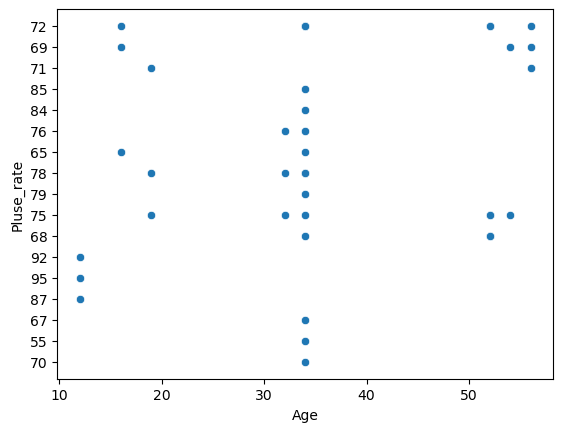

In [29]:
sns.scatterplot(x='Age', y='Pluse_rate', data=df)
plt.show()

In [31]:
sns.lineplot(x='Hour_range', y='Pluse_rate', data=df, hue='Gender')
plt.show()

ValueError: Could not interpret value `Hour_range` for `x`. An entry with this name does not appear in `data`.